

# Naive Bayes Classification


In this assignement you will load a customer dataset, fit the data, and use Naive Bayes Classification to predict a data point. 


**Naive Bayes Classification** In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. They are among the simplest Bayesian network models.But they could be coupled with Kernel density estimation and achieve higher accuracy levels.

Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression,which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

In the statistics and computer science literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes.All these names reference the use of Bayes' theorem in the classifier's decision rule, but naïve Bayes is not (necessarily) a Bayesian method.


### Here's an explanation about Naive Bayes Classifier from wikipedia

<img src="bayesClassifier.png">


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>


Lets load required libraries


In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Load Data From CSV File


In [30]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002087C4C2D60>]],
      dtype=object)

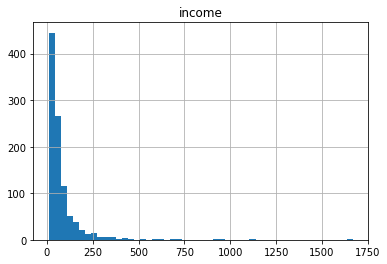

In [31]:
df.hist(column='income', bins=50)

### Feature set


Lets define feature sets, X:


In [32]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [33]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [34]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:


In [35]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [37]:
cls

<div id="classification">
    <h2>Classification</h2>
</div>


<h3>Naive Bayes Classification</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [38]:
from sklearn.naive_bayes import GaussianNB

### Training

Lets start the algorithm with Gaussian Distribution now:


In [39]:
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB()


GaussianNB()

### Predicting

we can use the model to predict the test set:


In [40]:
yhat=(clf.predict(X_test))
#yhat[0:5]
list(yhat).count(4)

36

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [41]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.365


## Practice

Please build your the Naive Bayes Classification Model with "numeric attributes tenure, age, income and employ" features here, with your own codes!
(Calculate Normal Probabilitis for each feature and apply Bayes Theorem to decide tle class labels!)

Compare your result with the given solution on upper part!


In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('teleCust1000t.csv')
X = df[['tenure','age', 'income', 'employ']] .values  #.astype(float)
y = df['custcat'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)




Train set: (800, 4) (800,)
Test set: (200, 4) (200,)


In [43]:
def separate_by_classes(X, y):
    ''' This function separates our dataset in subdatasets by classes '''
    classes = np.unique(y)
    classes_index = {}
    subdatasets = {}
    cls, counts = np.unique(y, return_counts=True)
    class_freq = dict(zip(cls, counts))
    print(class_freq)
    for class_type in classes:
        classes_index[class_type] = np.argwhere(y==class_type)
        subdatasets[class_type] = X[classes_index[class_type], :]
        class_freq[class_type] = class_freq[class_type]/sum(list(class_freq.values()))
    return subdatasets

In [44]:
X_seperated = separate_by_classes(X_train, y_train)

{1: 215, 2: 173, 3: 227, 4: 185}


In [45]:
means = {}
stds = {}

for i in range(1,5):
    means[i] = X_seperated[i].mean(axis=0)
    stds[i] = X_seperated[i].std(axis=0)

In [46]:
def gauss_dist(x,std, mn):
     return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mn)**2 / (2 * std**2) ) 

In [47]:
def predict(X, y):
    
    predicted = []
    
    for x in X:
        max_prob = 0
        max_prob = 0
        for i in range(4):
            result_1 = gauss_dist(x[0] ,stds[i+1][0][0], means[i+1][0][0])*gauss_dist(x[1] ,stds[i+1][0][1], means[i+1][0][1])*gauss_dist(x[2] ,stds[i+1][0][2], means[i+1][0][2])*gauss_dist(x[3] ,stds[i+1][0][3], means[i+1][0][3])
            result = (len(X_seperated[i+1]) / len(X_train) ) * result_1
            
            if result > max_prob:
                max_g = i
                max_prob = result
        predicted.append(max_g+1)
    
    return predicted

In [50]:
def evaluate(predicted, y):
    result = 0
    for i in range(len(predicted)):
        if predicted[i] == y[i]:
            result += 1

    print(f'result: %{100*result/len(predicted)} accuracy')

In [51]:
predicted = predict(X_test, y_test)

predicted.count(2)
evaluate(predicted, y_train)

result: %32.0 accuracy
